In [1]:
import time
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import json
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
pd.set_option('display.expand_frame_repr', False)  # display full dataframe width

In [2]:
URLSTART="https://www.goodreads.com"
BESTBOOKS="/list/show/1.Best_Books_Ever?page="
url = URLSTART+BESTBOOKS+'1'
print(url)
page = requests.get(url)



https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1


In [3]:
#Check for properties of the page:
page.status_code

200

In [15]:
#Writing a loop to fetch 10 pages:


URLSTART="https://www.goodreads.com"
BESTBOOKS="/list/show/1.Best_Books_Ever?page="
for i in range(1,3):
    bookpage=str(i)
    stuff=requests.get(URLSTART+BESTBOOKS+bookpage)
    filetowrite="page"+ '%02d' % i + ".html"
    print("FTW", filetowrite)
    fd=open(filetowrite,"w")
    fd.write(stuff.text)
    fd.close()
    time.sleep(2)



FTW page01.html
FTW page02.html


In [16]:
# Parse the page, extract book urls



bookdict={}
for i in range(1,3):
    books=[]
    stri = '%02d' % i
    filetoread="page"+ stri + '.html'
    print("FTW", filetoread)
    with open(filetoread) as fdr:
        data = fdr.read()
    soup = BeautifulSoup(data, 'html.parser')
    for e in soup.select('.bookTitle'):
        books.append(e['href'])
    print(books[:2])
    bookdict[stri]=books
    fd=open("list"+stri+".txt","w")
    fd.write("\n".join(books))
    fd.close()



FTW page01.html
['/book/show/2767052-the-hunger-games', '/book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix']
FTW page02.html
['/book/show/6.Harry_Potter_and_the_Goblet_of_Fire', '/book/show/153747.Moby_Dick_or_the_Whale']


In [17]:
len(bookdict)

2

In [41]:
# Parse a book page , extract book properties

furl=URLSTART+bookdict['02'][0]
furl



'https://www.goodreads.com/book/show/6.Harry_Potter_and_the_Goblet_of_Fire'

In [42]:
fstuff=requests.get(furl)
print(fstuff)

<Response [200]>


In [49]:
import re
yearre = r'\d{4}'
def get_year(d):
    if d.select_one("nobr.greyText"):
        return d.select_one("nobr.greyText").text.strip().split()[-1][:-1]
    else:
        thetext=d.select("div#details div.row")[1].text.strip()
        rowmatch=re.findall(yearre, thetext)
        if len(rowmatch) > 0:
            rowtext=rowmatch[0].strip()
        else:
            rowtext="NA"
        return rowtext






## Single Page

In [14]:
url = 'https://www.goodreads.com/book/show/2767052-the-hunger-games' 

response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

[]

In [24]:
soup.find('div', id ='details').find('span', itemprop = 'bookFormat').text

'Hardcover'

In [23]:
soup.find('div', id ='details').find('div', itemprop = 'inLanguage').text

'English'

In [29]:
soup.find('div', class_ ='bookAuthorProfile__followerCount').text

<div class="bookAuthorProfile__followerCount">
88,841
followers
</div>

In [37]:
for i in soup.find_all('div', class_ ='bigBoxContent containerWithHeaderContent'):#.find_all('div', class_ = 'left')

In [46]:
for i in soup.find_all('div', class_ ='elementList'):
    print(i.find('div', class_ = 'left'))
    #you'll need to use .get to grab the text

None
None
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/young-adult">Young Adult</a>
</div>
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/fiction">Fiction</a>
</div>
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/science-fiction">Science Fiction</a> &gt;
        <a class="actionLinkLite bookPageGenreLink" href="/genres/dystopia">Dystopia</a>
</div>
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/fantasy">Fantasy</a>
</div>
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/science-fiction">Science Fiction</a>
</div>
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/romance">Romance</a>
</div>
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/adventure">Adventure</a>
</div>
<div class="left">
<a class="actionLinkLite bookPageGenreLink" href="/genres/young-adult">Young Adult</a> &gt;
      

In [ ]:


# d=BeautifulSoup(fstuff.text, 'html.parser')
# title_tag = d.select("meta[property='og:title']")[0]['content']
# author_tag = d.find_all('a', {'class': "authorName"})[0].text
# rating_tag = d.select("span[itemprop='ratingValue']")[0].text.strip()
# ratingCount_tag = d.select_one("meta[itemprop='ratingCount']")["content"]
# Year_tag = get_year(d)
# pages_tag = d.select_one("meta[property='books:page_count']")['content']
      





In [52]:
"list{:0>2}.txt".format(2)


'list02.txt'

In [53]:
fetched=[]
for i in range(1,3):
    with open("list{:0>2}.txt".format(i)) as fd:
        counter=0
        for bookurl_line in fd:
            if counter > 101:
                break
            bookurl=bookurl_line.strip()
            stuff=requests.get(URLSTART+bookurl)
            filetowrite=bookurl.split('/')[-1]
            filetowrite="page"+str(i)+"_"+filetowrite+".html"
            print("FTW", filetowrite)
            fd=open(filetowrite,"w", encoding='utf-8')
            fd.write(stuff.text)
            fd.close()
            fetched.append(filetowrite)
            time.sleep(2)
            counter=counter+1




 

FTW page1_2767052-the-hunger-games.html
FTW page1_2.Harry_Potter_and_the_Order_of_the_Phoenix.html
FTW page1_2657.To_Kill_a_Mockingbird.html
FTW page1_1885.Pride_and_Prejudice.html
FTW page1_41865.Twilight.html
FTW page1_19063.The_Book_Thief.html
FTW page1_170448.Animal_Farm.html
FTW page1_11127.The_Chronicles_of_Narnia.html
FTW page1_30.J_R_R_Tolkien_4_Book_Boxed_Set.html
FTW page1_11870085-the-fault-in-our-stars.html
FTW page1_18405.Gone_with_the_Wind.html
FTW page1_386162.The_Hitchhiker_s_Guide_to_the_Galaxy.html
FTW page1_370493.The_Giving_Tree.html
FTW page1_6185.Wuthering_Heights.html
FTW page1_5297.The_Picture_of_Dorian_Gray.html
FTW page1_968.The_Da_Vinci_Code.html
FTW page1_10210.Jane_Eyre.html
FTW page1_929.Memoirs_of_a_Geisha.html
FTW page1_24213.Alice_s_Adventures_in_Wonderland_Through_the_Looking_Glass.html
FTW page1_22628.The_Perks_of_Being_a_Wallflower.html
FTW page1_3.Harry_Potter_and_the_Sorcerer_s_Stone.html
FTW page1_13079982-fahrenheit-451.html
FTW page1_24280.Les_M

FTW page2_7069.The_World_According_to_Garp.html


In [63]:
listofdicts=[]
for filetoread in fetched:
    print(filetoread)
   
        
    td={}
    with open(filetoread) as fd:
        datext = fd.read()
    d= BeautifulSoup(datext, 'html.parser')
    
    
    try:
        td['author']=d.find_all('a', {'class': "authorName"})[0].text
    except:
        td['title'] = np.NaN
    try:
        td['title']=d.select_one("meta[property='og:title']")['content']
        td['page_count']=d.select_one("meta[property='books:page_count']")['content']
        td['rating']=d.select("span[itemprop='ratingValue']")[0].text.strip(' \n')
        td['ratingCount']=d.select_one("meta[itemprop='ratingCount']")["content"]
        td['year'] = get_year(d)
    except:
        pass
        #     td['file']=filetoread
    listofdicts.append(td)



page1_2767052-the-hunger-games.html
page1_2.Harry_Potter_and_the_Order_of_the_Phoenix.html
page1_2657.To_Kill_a_Mockingbird.html
page1_1885.Pride_and_Prejudice.html
page1_41865.Twilight.html
page1_19063.The_Book_Thief.html
page1_170448.Animal_Farm.html
page1_11127.The_Chronicles_of_Narnia.html
page1_30.J_R_R_Tolkien_4_Book_Boxed_Set.html
page1_11870085-the-fault-in-our-stars.html
page1_18405.Gone_with_the_Wind.html
page1_386162.The_Hitchhiker_s_Guide_to_the_Galaxy.html
page1_370493.The_Giving_Tree.html
page1_6185.Wuthering_Heights.html
page1_5297.The_Picture_of_Dorian_Gray.html
page1_968.The_Da_Vinci_Code.html
page1_10210.Jane_Eyre.html
page1_929.Memoirs_of_a_Geisha.html
page1_24213.Alice_s_Adventures_in_Wonderland_Through_the_Looking_Glass.html
page1_22628.The_Perks_of_Being_a_Wallflower.html
page1_3.Harry_Potter_and_the_Sorcerer_s_Stone.html
page1_13079982-fahrenheit-451.html
page1_24280.Les_Mis_rables.html
page1_13335037-divergent.html
page1_4671.The_Great_Gatsby.html
page1_18144590

In [56]:
listofdicts[0]


{'title': 'The Hunger Games (The Hunger Games, #1)',
 'author': 'Suzanne Collins',
 'page_count': '374',
 'rating': '4.32',
 'ratingCount': '7201936',
 'year': '2008',
 'file': 'page1_2767052-the-hunger-games.html'}

In [67]:
books_df = pd.DataFrame.from_records(listofdicts)
books_df.head()



,author,title,page_count,rating,ratingCount,year
0,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",374,4.32,7201936,2008
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,870,4.50,2859822,2003
2,Harper Lee,To Kill a Mockingbird,336,4.27,5135736,1960
3,Jane Austen,Pride and Prejudice,279,4.27,3490948,1813
4,Stephenie Meyer,"Twilight (The Twilight Saga, #1)",498,3.62,5603404,2005


In [68]:
books_df.shape

(200, 6)

In [69]:
books_df.info() # There are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       181 non-null    object
 1   title        199 non-null    object
 2   page_count   181 non-null    object
 3   rating       181 non-null    object
 4   ratingCount  181 non-null    object
 5   year         181 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


In [70]:
books_df.duplicated().any()

False

In [72]:
books_df.isnull().sum()

author         19
title           1
page_count     19
rating         19
ratingCount    19
year           19
dtype: int64

In [95]:
clean_df = books_df.dropna(how='any', axis = 0)


In [97]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   author       181 non-null    object 
 1   title        181 non-null    object 
 2   page_count   181 non-null    object 
 3   rating       181 non-null    float64
 4   ratingCount  181 non-null    object 
 5   year         181 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.9+ KB


In [108]:
clean_df["rating"] = pd.to_numeric(clean_df["rating"])
clean_df["page_count"] = pd.to_numeric(clean_df["page_count"])
clean_df["ratingCount"] = pd.to_numeric(clean_df["ratingCount"])


/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_64693/2797237564.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_64693/2797237564.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_64693/2797237564.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [109]:
type(clean_df.rating)

pandas.core.series.Series

In [110]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   author       181 non-null    object 
 1   title        181 non-null    object 
 2   page_count   181 non-null    int64  
 3   rating       181 non-null    float64
 4   ratingCount  181 non-null    int64  
 5   year         181 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ KB


## Data Visualisation:


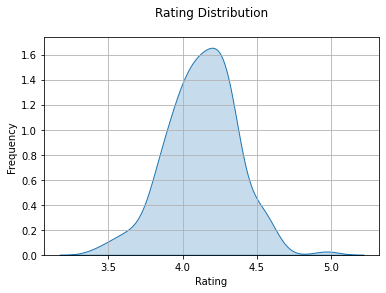

In [111]:
# ratings distribution:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



sns.kdeplot(clean_df['rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show();



In [105]:
fig = px.histogram(clean_df,
                  x = 'rating',
                  marginal = 'box',
                   nbins = 10,
                title = 'Distribution of ratings'
                   
                  )
fig.update_layout(bargap= 0.1)
fig.show()

In [114]:
fig = px.histogram(clean_df,
                  x = 'rating Count',
                  marginal = 'box',
                   nbins = 20,
                title = 'Distribution of rating counts',
                color_discrete_sequence = ['red']
                )
fig.update_layout(bargap= 0.1)
fig.show()

In [117]:
#Correlation of Avg_rating with page_count
clean_df.rating.corr(clean_df.page_count)

0.23480893570077632

In [120]:
#Correlation of Avg_rating with rating_count
print(clean_df.rating.corr(clean_df.ratingCount))


0.06918824179587163


In [121]:
clean_df.corr()

,page_count,rating,ratingCount
page_count,1.000000,0.234809,-0.109722
rating,0.234809,1.000000,0.069188
ratingCount,-0.109722,0.069188,1.000000


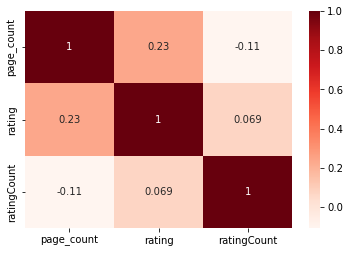

In [123]:
sns.heatmap(clean_df.corr(), cmap = 'Reds', annot = True);

## Linear Regression model:



The aim of this section is to come up with a model for predicting the book ratings. I'll use linear regression to build a model that predicts book ratings. 

The variables in my model are:

  - The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X i.e "rating".
    
 - The output variable is the variable that we want to predict. It is commonly referred to as y.



In [127]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [156]:
X = clean_df['page_count'].array
y = clean_df['rating']

In [157]:
# Split 80% of the data for Training set and 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [166]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train)


0.060182261678353166

In [167]:
# Use test data to check accurately our algorithm predicts the percentage score.
predictions = lr.predict(X_test.reshape(-1,1))

lr.score(X_train.reshape(-1,1), y_train)

0.060182261678353166

In [162]:
#comparing the actual output values for X_test with the predicted values.

pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.18,4.071900
1,4.01,4.108515
2,3.79,4.149789
3,3.52,4.145961
4,4.24,4.200717
5,3.84,4.111011
6,4.02,4.147293
7,4.30,4.231839
8,4.25,4.113674
9,4.28,4.140303


<AxesSubplot:>

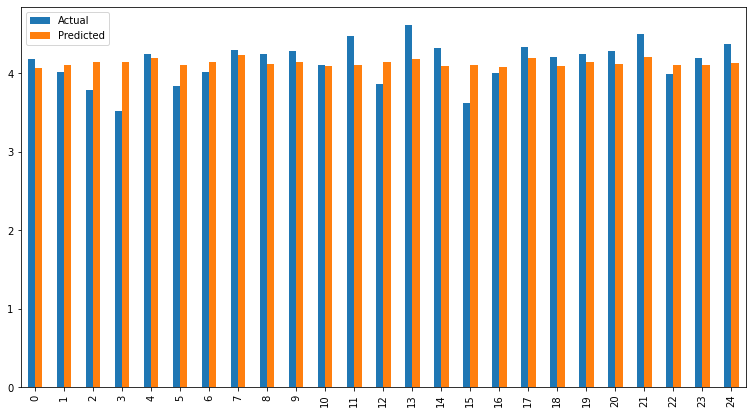

In [163]:
pred.plot(kind='bar', figsize=(13, 7))

In [164]:
# evaluating the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.172722582026662
MSE: 0.052813366663718796
RMSE: 0.22981158948956162


In [168]:
lr.score(X_train.reshape(-1,1), y_train)

0.060182261678353166